# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [16]:
# Import the libraries you'll need here.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(sns.__version__)
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

0.11.0
Python version
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)


# Load the csv file into a pandas dataframe.


In [2]:
# Load the csv file into a pandas dataframe.

df = pd.read_csv("data/cars.csv")
df.head()
#df.shape

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.

print(df.duplicated().sum())


720


In [4]:
#  2. Modify our df to have all duplicate rows removed. 

df = df.drop_duplicates()
df.shape

(11194, 15)

In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

print(df.duplicated().sum())

0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()

# engine HP has the most and have 69 nulls

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [7]:
# * Print how long (aka how many rows) our dataframe is.
len(df)


11194

In [8]:
# * Remove any row that has a null value in it. 
df = df.dropna()

df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

len(df)


11092

### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

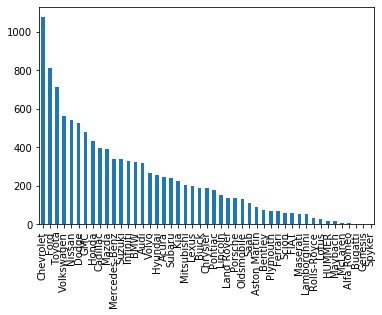

In [10]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

barData = df["Make"].value_counts()
#barData
barData.plot(kind="bar")

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

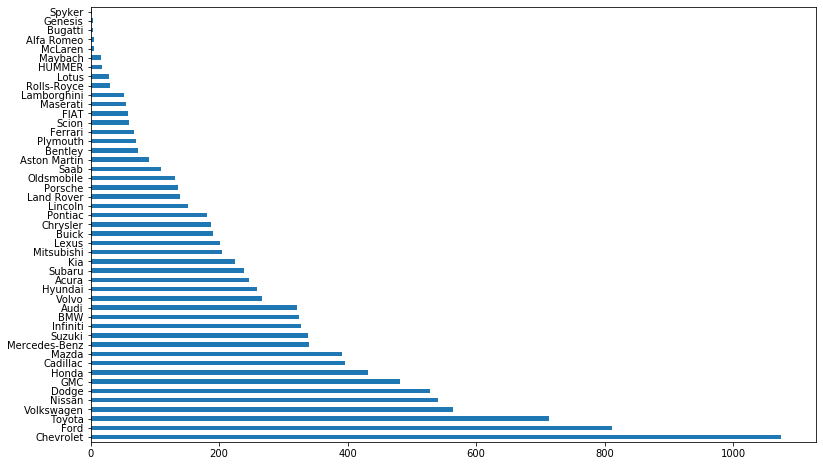

In [11]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

barData.plot(kind="barh", figsize=(13, 8))


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


Year
1990     2032.272727
1991     2120.196078
1992     2108.346457
1993     2211.496855
1994     2349.328125
1995     2647.206897
1996     2566.565217
1997     3164.644578
1998     3036.151724
1999     3153.850877
2000     3197.104348
2001    41500.666667
2002    33744.156098
2003    39774.063025
2004    36333.306034
2005    37029.951691
2006    32074.850515
2007    35278.404192
2008    56753.838509
2009    50876.837079
2010    52418.782609
2011    58060.146953
2012    61993.874286
2013    50770.798137
2014    65710.961397
2015    47506.750244
2016    47799.916098
2017    42224.902804
Name: MSRP, dtype: float64

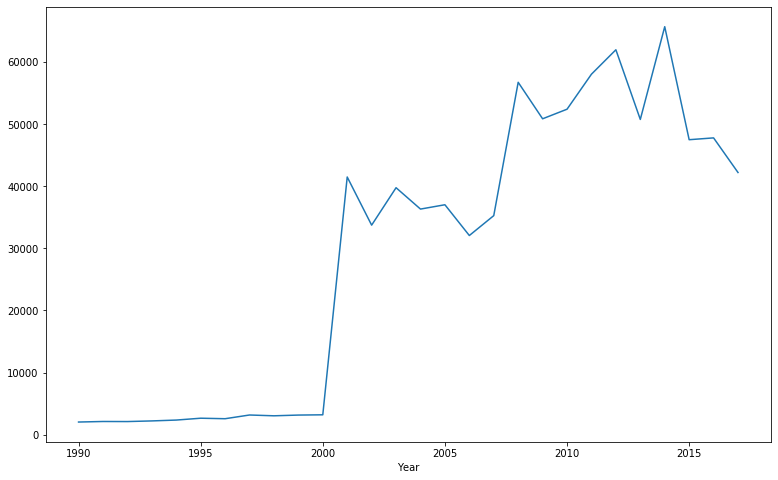

In [12]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
new_df = df.groupby(["Year"])["MSRP"].mean()
new_df.plot(kind='line', x="Year", y='MSRP', figsize=(13,8));
new_df


# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

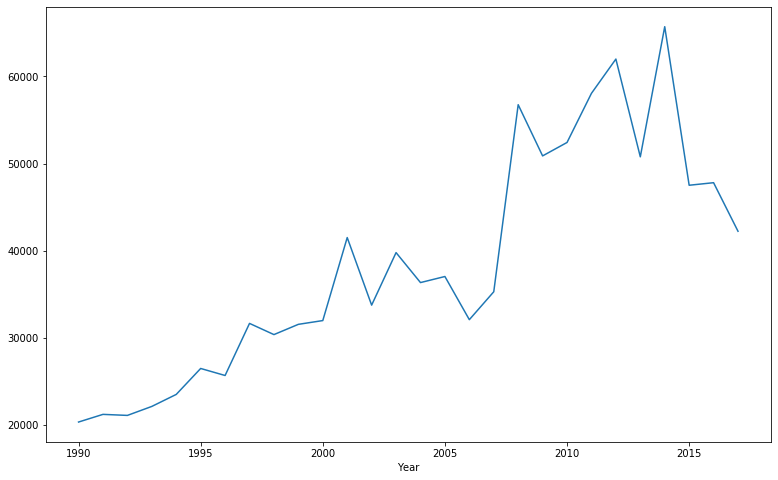

In [13]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.


adjusted_df = df.copy()
mask1 = df["Year"] <= 2000
adjusted_df["priceMod"] = np.where(mask1, 10, 1) 
adjusted_df["adjusted_price"]= adjusted_df["MSRP"]*adjusted_df["priceMod"]

adjData_df = adjusted_df.groupby(["Year"])["adjusted_price"].mean()
adjData_df.plot(kind='line', x="Year", y='adjusted_price', figsize=(13,8));



# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

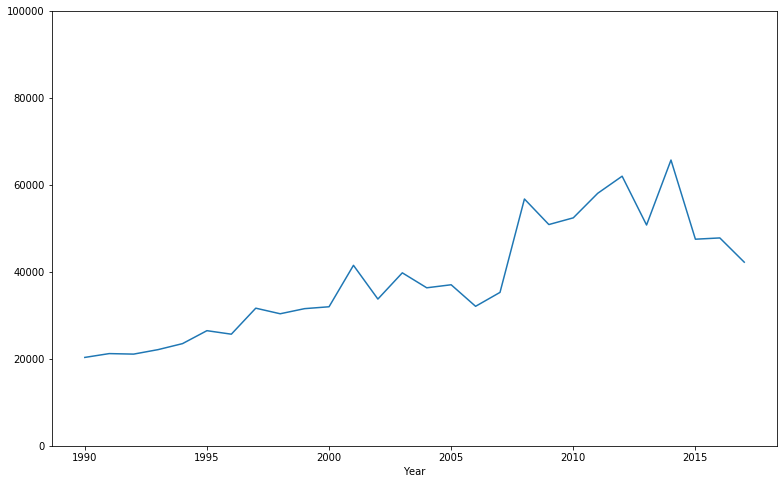

In [14]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000

adjData_df.plot(kind='line', x="Year", y='adjusted_price', figsize=(13,8), ylim=(0, 100000));


# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [15]:
# What are the top 5 car makers make the most expensive cars on average. 

avePriceSeries = adjusted_df.groupby("Make")["adjusted_price"].mean()
sortedPriceSeries = avePriceSeries.sort_values(ascending=False)
sortedPriceSeries.round(2).head()

Make
Bugatti        1757223.67
Maybach         546221.88
Rolls-Royce     351130.65
Lamborghini     331567.31
Bentley         247169.32
Name: adjusted_price, dtype: float64

# What are the top 5 car makers that have the highest median highway MPG?

In [17]:
# Which car makers have the highest median highway MPG?
medianSeries = adjusted_df.groupby("Make")["highway MPG"].median()

sortedMedianSeries = medianSeries.sort_values(ascending=False)
sortedMedianSeries.head()

Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

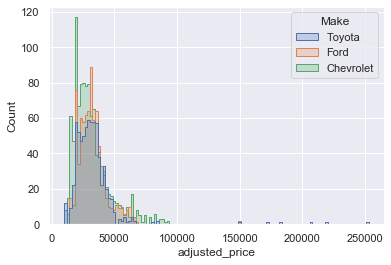

In [53]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
mask1 = adjusted_df["Make"] == "Chevrolet"
mask2 = adjusted_df["Make"] == "Ford"
mask3 = adjusted_df["Make"] == "Toyota"

threeMaker_df = adjusted_df[mask1 | mask2 | mask3]
sns.set()

sns.histplot(data=threeMaker_df, x="adjusted_price", hue="Make", element="step")

# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0, 100000)

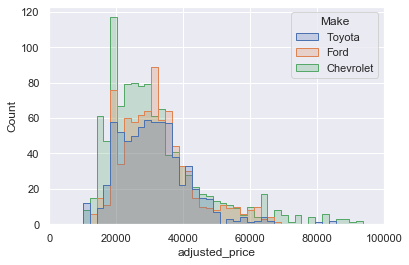

In [56]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

ax = sns.histplot(data=threeMaker_df, x="adjusted_price", hue="Make", element="step")
ax.set_xlim(0, 100000)

# Plot the relationship between Engine HP and highway MPG

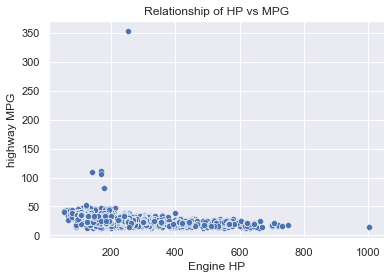

In [57]:
# Plot the relationship between Engine HP and highway MPG

ax = sns.scatterplot(data=df, x='Engine HP', y='highway MPG');
ax.set_title("Relationship of HP vs MPG");


# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

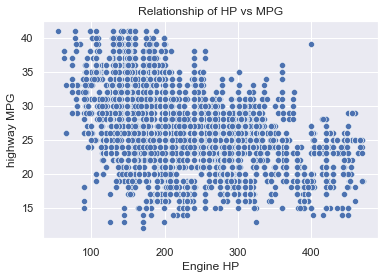

In [65]:
# Remove any statisical outliers from Engine HP and highway MPG
import scipy.stats as stats 

numerical_cols = ['Engine HP', "highway MPG"]
z_score_cols = [col + '_zscore' for col in numerical_cols]

for (nCol, zCol)  in zip(numerical_cols, z_score_cols):
    df[zCol] = stats.stats.zscore(df[nCol])
    df[zCol] = abs(df[zCol])
    
    
mask1 = df['Engine HP_zscore'] < 3
mask2 = df['highway MPG_zscore'] < 3 
filteredZ_df = df[mask1 & mask2]

ax = sns.scatterplot(data=filteredZ_df, x='Engine HP', y='highway MPG');
ax.set_title("Relationship of HP vs MPG");


# What does this plot tell you about how Engine HP affects highway MPG?

In [66]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('they have a inverse relationship')

they have a inverse relationship


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

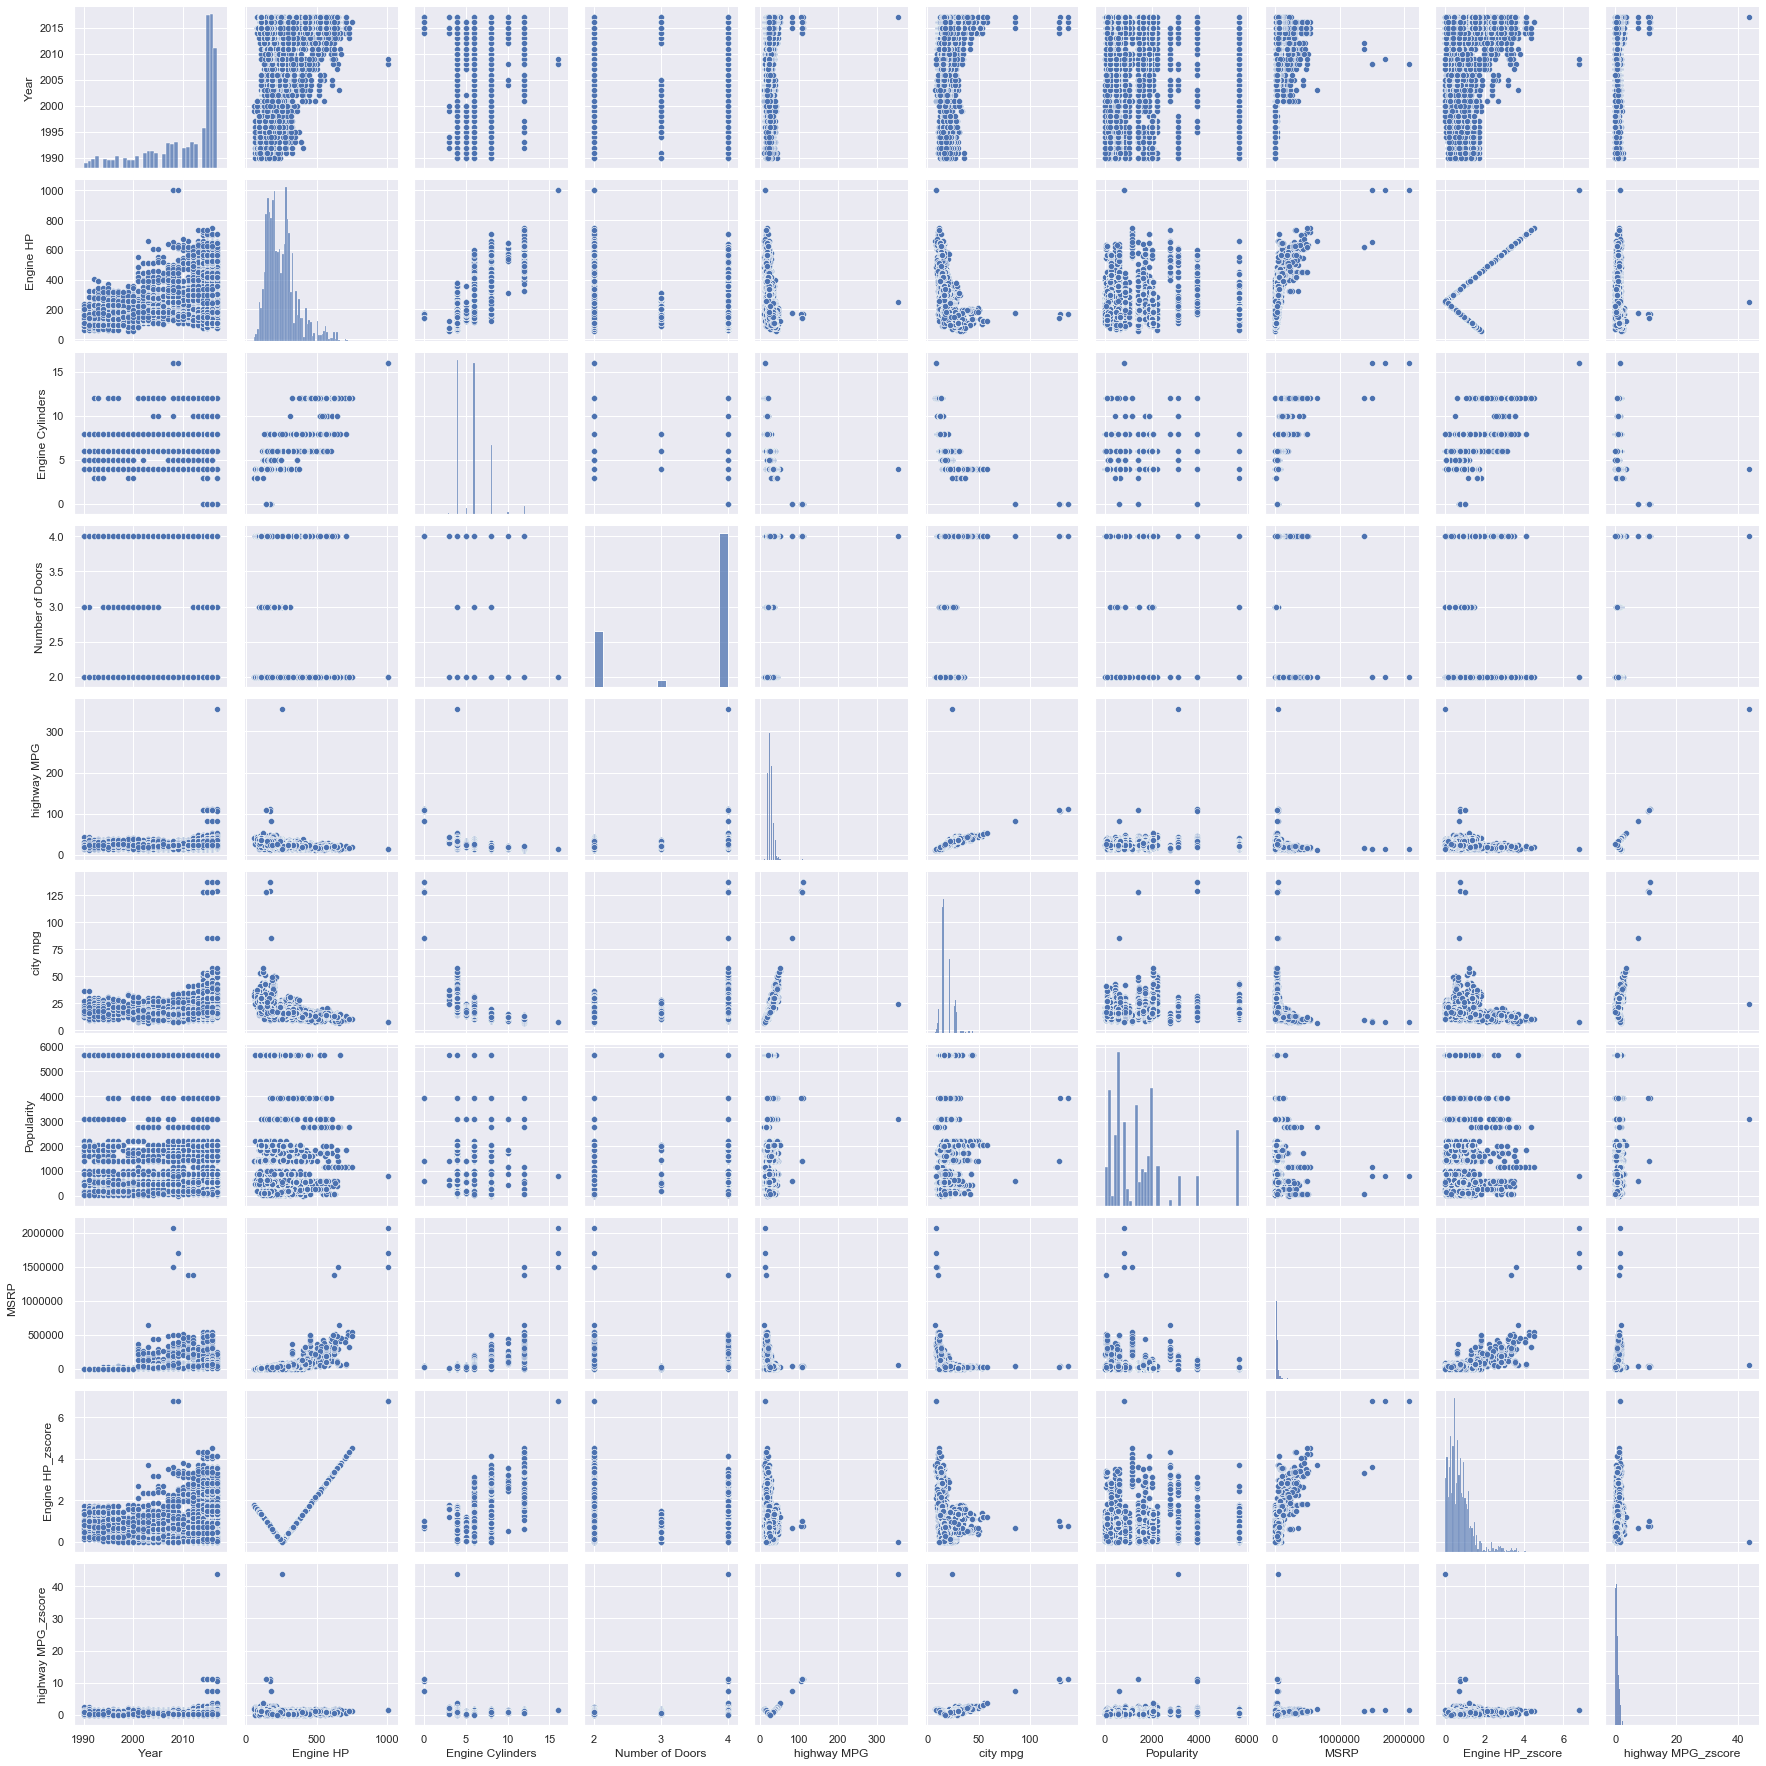

In [68]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)

In [17]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('engine HP vs Year\nengine Cylinders vs Engine HP \nhighway MPG and city MPG \ncity MPG vs year \ncity MPG vs engine HP \nMSRP vs year \nMSRP vs engine HP')



engine HP vs Year
engine Cylinders vs Engine HP 
highway MPG and city MPG 
city MPG vs year 
city MPG vs engine HP 
MSRP vs year 
MSRP vs engine HP


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

engine HP is highly coorelated with the # of cylinders, 


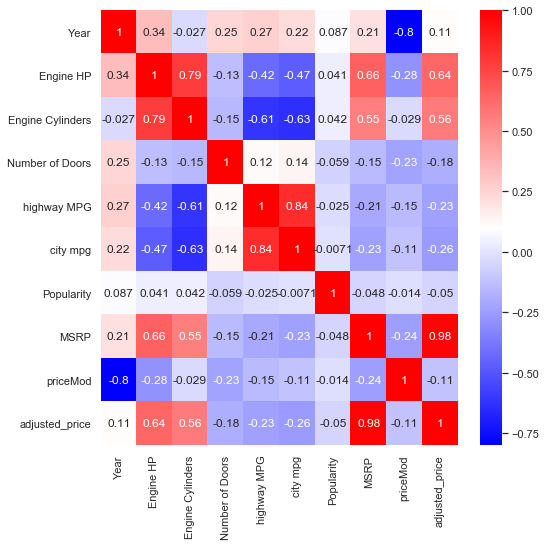

In [79]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize=(8,8))
sns.heatmap(adjusted_df.corr(), annot=True, cmap='bwr')
print("engine HP is highly coorelated with the # of cylinders, because cylinders adds power to the engine and that ussually adds HP")


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



['make', 'model', 'year', 'engine_fuel_type', 'engine_hp', 'engine_cylinders', 'transmission_type', 'driven_wheels', 'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg', 'city_mpg', 'popularity', 'msrp', 'pricemod', 'adjusted_price']
  make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  

Text(0.5, 1.0, "ford's adjusted price")

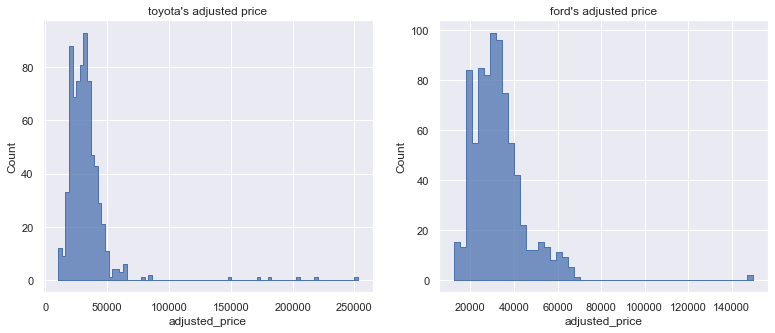

In [19]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well
df_copy = adjusted_df.copy()

columns = df_copy.columns.values
newColumns = [col.lower().replace(" ", "_") for col in columns]
df_copy.columns = newColumns
print(newColumns)

f, axes = plt.subplots(1, 2, figsize=(13,5))
toyota_df = df_copy[df_copy["make"] == "Toyota"]
ford_df = df_copy[df_copy["make"] == "Ford"]
sns.set()

ax = sns.histplot(data=toyota_df, x="adjusted_price", element="step", ax=axes[0])
ax.set_title("toyota's adjusted price")
ax = sns.histplot(data=ford_df, x="adjusted_price", element="step", ax=axes[1])
ax.set_title("ford's adjusted price")

